In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

# Einlesen der Bevölkerungsdaten aus Österreich

### Einlesen der Sterbefälle in Östereich über die Altersgruppen

In [2]:
#read sterbefälle pro monat
österreich_sterbefälle_altersgruppen = pd.read_excel(f"Data\\gestorbene_seit_2006_nach_altersgruppen_bearbeitet.xlsx")

#Datensatz ist selbst zusammengebaut
österreich_sterbefälle_altersgruppen = österreich_sterbefälle_altersgruppen[österreich_sterbefälle_altersgruppen.columns].replace(["-",".","X "],0)
österreich_sterbefälle_altersgruppen

,Nr.,Jahr,Alter,Männer,Frauen,Insgesamt
0,1,2006,Insgesamt,34757,39538,74295
1,2,2006,0 bis 14 Jahre,261,186,447
2,3,2006,15 bis 19 Jahre,181,62,243
3,4,2006,20 bis 24 Jahre,222,75,297
4,5,2006,25 bis 29 Jahre,183,75,258
...,...,...,...,...,...,...
250,251,2020,65 bis 69 Jahre,3607,2082,5689
251,252,2020,70 bis 74 Jahre,5069,3215,8284
252,253,2020,75 bis 79 Jahre,6970,5265,12235
253,254,2020,80 bis 84 Jahre,7809,7072,14881


### Österreich Bevölkerung

In [3]:
bevölkerung_österreich = pd.read_excel(f"Data\\table_2022-05-29_19-20-56.xlsx", index_col=0).reset_index(drop=True)
bevölkerung_österreich

,Jahr,Altersgruppen,männlich,weiblich,Insgesamt
0,2002,bis 14 Jahre,689766,656006,1345772
1,2002,15 bis 19 Jahre,246631,235420,482051
2,2002,20 bis 24 Jahre,244102,236895,480997
3,2002,25 bis 29 Jahre,263353,264940,528293
4,2002,30 bis 34 Jahre,331851,327188,659039
...,...,...,...,...,...
395,2021,85 bis 89 Jahre,50820,89646,140466
396,2021,90 bis 94 Jahre,19894,45781,65675
397,2021,95 bis 99 Jahre,3396,12902,16298
398,2021,100 Jahre und älter,218,1203,1421


### Deutschland Bevölkerung

In [4]:
deutsch_bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0).reset_index(drop=True)
deutsch_bevölkerung

,Jahr,Alter,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Gesamt
0,1990,unter 1 Jahr,119162,136550,41485,29040,6851,16629,62328,23291,83095,199981,43012,11215,49556,31411,29179,28657,911442
1,1990,1-Jährige,114672,129986,38824,31792,6552,15550,60670,25424,79748,192662,41210,10950,53584,33451,28288,30488,893851
2,1990,2-Jährige,116459,130981,39899,34300,6537,15772,60841,27284,81154,195867,42553,11180,56712,36113,28726,33405,917783
3,1990,3-Jährige,110080,124102,38900,35986,6235,14534,58403,29125,77700,188769,41173,10953,59380,37339,27379,34428,894486
4,1990,4-Jährige,109664,123680,37737,35290,6026,13868,56944,28284,76474,184442,40529,10981,58300,36631,26005,34154,879009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2020,87-Jährige,38312,43512,10243,10105,2244,5301,20549,6791,27702,62723,14619,3985,17717,9317,9953,8377,291450
2848,2020,88-Jährige,33330,38699,8576,8811,1938,4580,18106,6091,24439,55507,12764,3583,15081,8137,8488,7415,255545
2849,2020,89-Jährige,29520,33392,7694,7667,1749,4168,15998,5061,22048,49406,11429,3179,13748,7079,7715,6428,226281
2850,2020,90 Jahre und mehr,108225,122252,30029,26464,7160,17250,62984,16715,83231,184859,43862,10966,51868,24957,29586,23283,843691


In [14]:
#read sterbefälle pro monat
deutsch_sterbefälle_altersgruppen = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_groß.xlsx", sheet_name='D_2016-2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
deutsch_sterbefälle_altersgruppen = deutsch_sterbefälle_altersgruppen[deutsch_sterbefälle_altersgruppen.columns].replace(["-",".","X "],0)
deutsch_sterbefälle_altersgruppen

,Nr.,Jahr,Alter,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,35,2020,Insgesamt,84980,80030,87396,83830,75835,72159,73795,78742,74243,79781,85989,108792,985572
1,36,2020,0-15,272,291,313,289,277,275,278,273,277,260,240,261,3306
2,37,2020,15-30,329,330,320,288,311,329,335,357,305,320,309,311,3844
3,38,2020,30-35,248,191,229,221,199,213,249,204,224,206,197,226,2607
4,39,2020,35-40,374,330,332,345,346,308,336,316,318,326,328,402,4061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,387,2000,75-80,12695,11668,10979,10282,10020,9795,9784,9956,9537,10346,10313,10911,126286
353,388,2000,80-85,10350,9692,8954,8351,8124,7919,8018,7948,7977,8702,8806,9370,104211
354,389,2000,85-90,15951,14812,13574,12355,11838,11343,11402,11365,11133,11863,12123,12829,150588
355,390,2000,90-95,9386,8742,7715,7130,6838,6863,6655,6894,6652,7409,7617,8126,90027


In [15]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.
new_row = (deutsch_sterbefälle_altersgruppen.loc[deutsch_sterbefälle_altersgruppen["Alter"]=="90-95"]) + (deutsch_sterbefälle_altersgruppen.loc[deutsch_sterbefälle_altersgruppen["Alter"]=="95 u. mehr"])
age_90_95 = deutsch_sterbefälle_altersgruppen.loc[deutsch_sterbefälle_altersgruppen["Alter"]=="90-95"]
mehr_95 = deutsch_sterbefälle_altersgruppen.loc[deutsch_sterbefälle_altersgruppen["Alter"]=="95 u. mehr"]

new_row = age_90_95.iloc[0,3:] + mehr_95.iloc[0,3:]
index_95 = list(age_90_95.index)
index_mehr = list(mehr_95.index)

for i in range (len(index_95)):
    new_row = age_90_95.iloc[i,3:] +mehr_95.iloc[i,3:]
    deutsch_sterbefälle_altersgruppen.loc[index_95[i], "Januar":] = new_row
    deutsch_sterbefälle_altersgruppen.drop(index_mehr[i], inplace=True)


deutsch_sterbefälle_altersgruppen['Alter'].replace({'90-95': '90<'}, inplace = True)
deutsch_sterbefälle_altersgruppen = deutsch_sterbefälle_altersgruppen.rename(columns={'Januar': 1,'Februar': 2,'März': 3,'April': 4,'Mai': 5,'Juni': 6,'Juli': 7,'August': 8,'September': 9,'Oktober': 10,'November': 11,'Dezember': 12})
deutsch_sterbefälle_altersgruppen

## Einteilen der Altersgruppen
Für Österreich

In [6]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,32):
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 15):
            x += bevölkerungs_anzahl
            if (i == 14):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0

        elif (i >= 15 and  i < 85):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif (i >= 85 and  i <= 90):
            x += bevölkerungs_anzahl
            if i == 90:
                rows.append([1990+k-1,"85<", x])
                x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0


alters_gruppen_deutsch = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])
alters_gruppen_deutsch

,Jahr,Alter,Anzahl
0,1990,0 - <15,12937503
1,1990,15 - <20,4369092
2,1990,20 - <25,6318534
3,1990,25 - <30,7004877
4,1990,30 - <35,6249072
...,...,...,...
522,2020,70 - <75,3968070
523,2020,75 - <80,3468028
524,2020,80 - <85,3430502
525,2020,85<,2505932


Für Deutschland

In [20]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,32):
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 15):
            x += bevölkerungs_anzahl
            if (i == 14):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0

        elif (i >= 15 and  i < 30):

            x += bevölkerungs_anzahl
            if i == 29:
                rows.append([1990+k-1,(str(i-14)+" - <"+str(i+1)), x])


                x = 0

        elif (i >= 30 and  i < 90):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif i == 90:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"90=<", x])
            x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0



new_df = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])

In [21]:
new_df

,Jahr,Alter,Anzahl
0,1990,0 - <15,12937503
1,1990,15 - <30,17692503
2,1990,30 - <35,6249072
3,1990,35 - <40,5651627
4,1990,40 - <45,5050480
...,...,...,...
491,2020,75 - <80,3468028
492,2020,80 - <85,3430502
493,2020,85 - <90,1662241
494,2020,90=<,843691


#### Einteilen der Bevölkerungsdaten

In [7]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.

#Auswählen der gewünschten Spalten
alter_85_bis_89 = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="85 bis 89 Jahre"]
alter_90_bis_94 = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="90 bis 94 Jahre"]
alter_95_bis_99 = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="95 bis 99 Jahre"]
alter_100_und_mehr = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="100 Jahre und älter"]

#Aufsummieren der Zeilen
index_85_bis_89 = list(alter_85_bis_89.index)
index_90_bis_94 = list(alter_90_bis_94.index)
index_95_bis_99 = list(alter_95_bis_99.index)
index_100_und_mehr = list(alter_100_und_mehr.index)

for i in range (len(index_85_bis_89)):
    new_row = alter_85_bis_89.iloc[i,2:] + alter_90_bis_94.iloc[i,2:] + alter_95_bis_99.iloc[i,2:] + alter_100_und_mehr.iloc[i,2:]
    bevölkerung_österreich.loc[index_85_bis_89[i], "männlich":] = new_row
    bevölkerung_österreich.drop([index_90_bis_94[i],index_95_bis_99[i],index_100_und_mehr[i]], inplace=True)

bevölkerung_österreich['Altersgruppen'].replace({'85 bis 89 Jahre': '85<'}, inplace = True)

In [8]:
bevölkerung_österreich

,Jahr,Altersgruppen,männlich,weiblich,Insgesamt
0,2002,bis 14 Jahre,689766,656006,1345772
1,2002,15 bis 19 Jahre,246631,235420,482051
2,2002,20 bis 24 Jahre,244102,236895,480997
3,2002,25 bis 29 Jahre,263353,264940,528293
4,2002,30 bis 34 Jahre,331851,327188,659039
...,...,...,...,...,...
392,2021,70 bis 74 Jahre,189301,222212,411513
393,2021,75 bis 79 Jahre,149676,192335,342011
394,2021,80 bis 84 Jahre,115999,162246,278245
395,2021,85<,74328,149532,223860


# Altersbereinigung der Sterbefälle aus Österreich mithilfe der deutschen Standardpopulation

#### Berechnung der rohen Sterberate
Berechnung der rohen Sterberate für Österreich

In [41]:
#rohe sterberate
#loop über jahre
sterberaten_roh_at = []
for n in range(0,15):
    z = österreich_sterbefälle_altersgruppen.loc[(österreich_sterbefälle_altersgruppen["Jahr"]==2020-n)].reset_index(drop= True)
    sterberate_gesamt = 0

    gesamt_bev = bevölkerung_österreich.loc[bevölkerung_österreich["Jahr"]==2020-n]["Insgesamt"].reset_index(drop= True)
    #loop über altersgruppen
    for i in range(1,17):
        mri = ((z.loc[z.index[i]]["Insgesamt"]) / gesamt_bev[16]) * 100000  #sterberate je altersgruppe
        sterberate_gesamt += mri


    sterberaten_roh_at.append([2020-n, sterberate_gesamt])
    sterberate_gesamt = 0

sterberaten_roh_at = pd.DataFrame(sterberaten_roh_at, columns=["Jahr", "Sterberate_Roh"])
sterberaten_roh_at

,Jahr,Sterberate_Roh
0,2020,1029.079220
1,2019,941.281385
2,2018,951.852851
3,2017,949.176808
4,2016,927.179689
5,2015,967.661224
6,2014,919.769256
7,2013,940.928979
8,2012,944.753293
9,2011,913.164208


Berechnung der rohen Sterberate für Deutschland

In [42]:
#rohe sterberate
#loop über jahre
sterberaten_roh_de = []
for n in range(0,21):
    z_de = deutsch_sterbefälle_altersgruppen.loc[(deutsch_sterbefälle_altersgruppen["Jahr"]==2020-n)]
    sterberate_gesamt_de = 0

    # gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]
    gesamt_bev_de = new_df.loc[new_df["Jahr"]==2020-n]["Anzahl"].reset_index(drop= True)

    #loop über altersgruppen
    for i in range(1,16):
        mri_de = ((z_de.loc[z_de.index[i]]["Insgesamt"]) / gesamt_bev_de[15]) * 100000  #sterberate je altersgruppe
        sterberate_gesamt_de += mri_de


    sterberaten_roh_de.append([2020-n, sterberate_gesamt_de])
    sterberate_gesamt_de = 0

sterberaten_roh_de = pd.DataFrame(sterberaten_roh_de, columns=["Jahr", "Sterberate_Roh"])
sterberaten_roh_de

,Jahr,Sterberate_Roh
0,2020,1185.222335
1,2019,1129.682765
2,2018,1150.184356
3,2017,1126.025519
4,2016,1103.830288
5,2015,1125.880498
6,2014,1069.436380
7,2013,1106.664697
8,2012,1079.907534
9,2011,1061.060976


### Altersbereinigte Sterberate (Standardbevölkerung: 2020)

Auswahl der Standardbevölkerung mit der Einteilung für Österreich

In [34]:
standard_bevölkerung_fuer_at = alters_gruppen_deutsch.loc[alters_gruppen_deutsch["Jahr"]==2020]
standard_bevölkerung_fuer_at

,Jahr,Alter,Anzahl
510,2020,0 - <15,11477800
511,2020,15 - <20,3856774
512,2020,20 - <25,4570491
513,2020,25 - <30,4912939
514,2020,30 - <35,5581088
515,2020,35 - <40,5290876
516,2020,40 - <45,5034888
517,2020,45 - <50,5035860
518,2020,50 - <55,6487224
519,2020,55 - <60,6817318


In [37]:
standard_bevölkerung_fuer_de = new_df.loc[new_df["Jahr"]==2020]
standard_bevölkerung_fuer_de

,Jahr,Alter,Anzahl
480,2020,0 - <15,11477800
481,2020,15 - <30,13340204
482,2020,30 - <35,5581088
483,2020,35 - <40,5290876
484,2020,40 - <45,5034888
485,2020,45 - <50,5035860
486,2020,50 - <55,6487224
487,2020,55 - <60,6817318
488,2020,60 - <65,5818137
489,2020,65 - <70,4899104


### Altersbereinigung AT

In [36]:
#altersbereinigt
sterberaten_bereinigt_at = []
#loop über jahre
for n in range(0,15):
    z_at = österreich_sterbefälle_altersgruppen.loc[(österreich_sterbefälle_altersgruppen["Jahr"]==2020-n)] #Österreich
    q_at = bevölkerung_österreich.loc[bevölkerung_österreich["Jahr"]==2020-n] #Österreich
    gesamt_bev_at = standard_bevölkerung_fuer_at.loc[standard_bevölkerung_fuer_at.index[16]][2] #Deutsch
    erg_sum_at = 0
    sum_at = 0

    #loop über Altersgruppen
    for i in range(0,16):
        asx_at = standard_bevölkerung_fuer_at.loc[standard_bevölkerung_fuer_at.index[i]][2] #bevölkerung je altersgruppe Standardbevölkerung
        bevölkerung_grp = q_at.loc[q_at.index[i]][4] #größe Bevölkerungsruppe untersuchte Bevölkerung
        subx_at = ((z_at.loc[z_at.index[i+1]]["Insgesamt"]) / bevölkerung_grp) * 100000 #sterberate je altersgruppe
        sum_at += (asx_at * subx_at)

    erg_at = sum_at / gesamt_bev_at
    erg_sum_at += erg_at

    sterberaten_bereinigt_at.append([2020-n, erg_sum_at])

sterberaten_bereinigt_at = pd.DataFrame(sterberaten_bereinigt_at, columns=["Jahr", "Sterberate_bereinigt"])
sterberaten_bereinigt_at

,Jahr,Sterberate_bereinigt
0,2020,1208.386443
1,2019,1121.518767
2,2018,1142.991848
3,2017,1149.662777
4,2016,1132.523083
5,2015,1187.634373
6,2014,1142.883523
7,2013,1183.266445
8,2012,1199.729171
9,2011,1181.062066


### Altersbereinigung DE

In [39]:
#altersbereinigt
sterberaten_bereinigt_de = []
#loop über jahre
for n in range(0,21):
    z_de = deutsch_sterbefälle_altersgruppen.loc[(deutsch_sterbefälle_altersgruppen["Jahr"]==2020-n)]
    q_de = new_df.loc[new_df["Jahr"]==2020-n]
    erg_sum_de = 0
    gesamt_bev_de = standard_bevölkerung_fuer_de.loc[standard_bevölkerung_fuer_de.index[15]][2]


    sum_de = 0
    #loop über Altersgruppen
    for i in range(0,15):

        asx_de = standard_bevölkerung_fuer_de.loc[standard_bevölkerung_fuer_de.index[i]][2] #bevölkerung je altersgruppe Standardbevölkerung
        bevölkerung_grp_de = q_de.loc[q_de.index[i]][2] #größe Bevölkerungsruppe untersuchte Bevölkerung
        subx_de = ((z_de.loc[z_de.index[i+1]]["Insgesamt"]) / bevölkerung_grp_de) * 100000 #sterberate je altersgruppe
        sum_de += (asx_de * subx_de)

    erg_de = sum_de / gesamt_bev_de
    erg_sum_de += erg_de

    #print(2020-n, "Altersbereinigt:",erg_sum)
    sterberaten_bereinigt_de.append([2020-n, erg_sum_de])

sterberaten_bereinigt_de = pd.DataFrame(sterberaten_bereinigt_de, columns=["Jahr", "Sterberate_bereinigt"])
sterberaten_bereinigt_de

,Jahr,Sterberate_bereinigt
0,2020,1185.222335
1,2019,1149.673605
2,2018,1197.393629
3,2017,1188.107432
4,2016,1179.444093
5,2015,1224.669549
6,2014,1173.900083
7,2013,1245.784266
8,2012,1234.310317
9,2011,1233.602427


## Visualisierung

In [45]:
sterberaten_roh_de.loc[sterberaten_roh_de["Jahr"]>2005]

,Jahr,Sterberate_Roh
0,2020,1185.222335
1,2019,1129.682765
2,2018,1150.184356
3,2017,1126.025519
4,2016,1103.830288
5,2015,1125.880498
6,2014,1069.436380
7,2013,1106.664697
8,2012,1079.907534
9,2011,1061.060976


(array([ 800.,  900., 1000., 1100., 1200., 1300., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

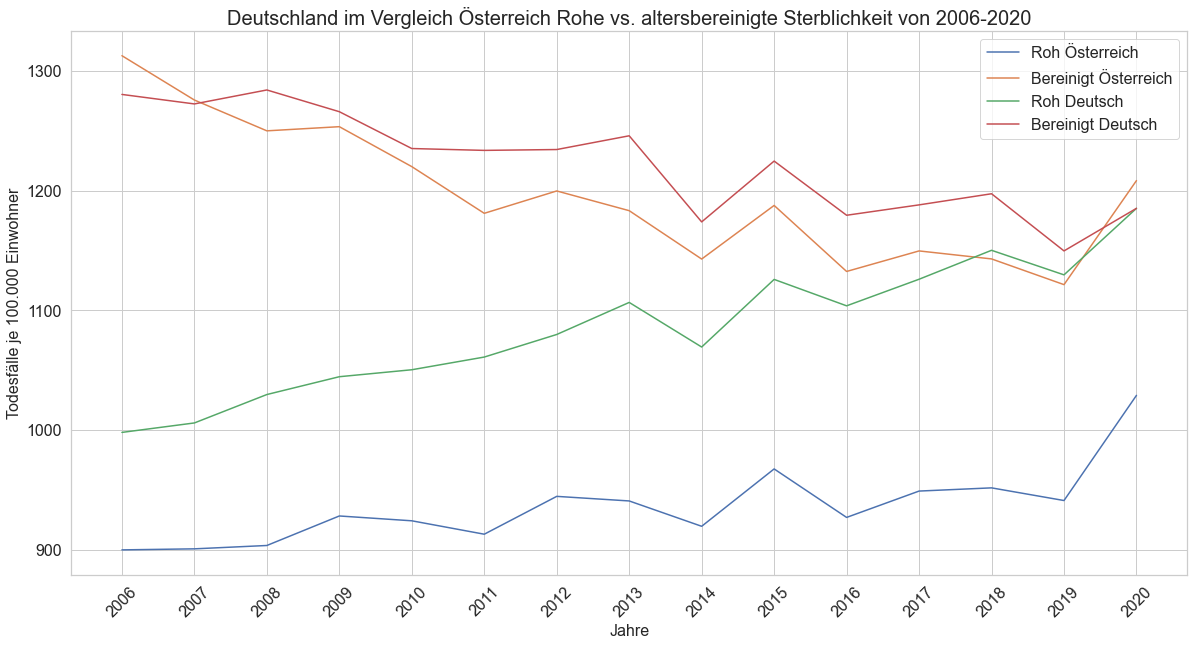

In [55]:
xticks = [i for i in range(2006,2021)]

ax = sns.lineplot(x="Jahr",  y='Sterberate_Roh', data=sterberaten_roh_at, label='oestereich_roh')
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate_bereinigt', data=sterberaten_bereinigt_at, label='oestereich_bereingt')
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate_Roh', data=sterberaten_roh_de.loc[sterberaten_roh_de["Jahr"]>2005], label='deutsch_roh')
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate_bereinigt', data=sterberaten_bereinigt_de.loc[sterberaten_bereinigt_de["Jahr"]>2005], label='deutsch_roh') #sterberaten_roh_de.loc[sterberaten_roh_de["Jahr"]>2005]
plt.legend(labels=['Roh Österreich','Bereinigt Österreich', 'Roh Deutsch','Bereinigt Deutsch'],fontsize= 16)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20, 10)

grippe_wellen = [2009,2013,2015,2018,2020]

ax.set_ylabel("Todesfälle je 100.000 Einwohner", fontsize = 16)
ax.set_xlabel("Jahre", fontsize = 16)
ax.set_title("Deutschland im Vergleich Österreich Rohe vs. altersbereinigte Sterblichkeit von 2006-2020",fontsize = 20)
plt.xticks(range(min(xticks), max(xticks)+1, 1), fontsize=16)
plt.yticks(fontsize=16)



# Berechnung der Comparative Mortality Ratio

In [56]:
cmr_df_at = pd.DataFrame(sterberaten_bereinigt_at, columns=["Jahr", "Sterberate_bereinigt"])
cmr_df_at["cmr"] = 0 # Damit Colum erzeugt wird
for i in range (len(cmr_df_at)):
    cmr_df_at["cmr"][i] = cmr_df_at["Sterberate_bereinigt"][i]/sterberaten_roh_at["Sterberate_Roh"][i]
cmr_df_at

C:\Users\mikes\AppData\Local\Temp\ipykernel_25716\1181401061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_df_at["cmr"][i] = cmr_df_at["Sterberate_bereinigt"][i]/sterberaten_roh_at["Sterberate_Roh"][i]


,Jahr,Sterberate_bereinigt,cmr
0,2020,1208.386443,1.174240
1,2019,1121.518767,1.191481
2,2018,1142.991848,1.200807
3,2017,1149.662777,1.211221
4,2016,1132.523083,1.221471
5,2015,1187.634373,1.227325
6,2014,1142.883523,1.242576
7,2013,1183.266445,1.257551
8,2012,1199.729171,1.269886
9,2011,1181.062066,1.293373


Vergleich zwischen Deutschland und Österreich mittels CMR

In [57]:
cmr_df_vgl = pd.DataFrame(sterberaten_bereinigt_de, columns=["Jahr", "Sterberate_bereinigt"])
cmr_df_vgl = cmr_df_vgl.loc[cmr_df_vgl["Jahr"]>2005]
cmr_df_vgl["cmr"] = 0 # Damit Colum erzeugt wird
for i in range (len(cmr_df_vgl)):
    cmr_df_vgl["cmr"][i] = cmr_df_vgl["Sterberate_bereinigt"][i]/sterberaten_bereinigt_at["Sterberate_bereinigt"][i]
cmr_df_vgl

C:\Users\mikes\AppData\Local\Temp\ipykernel_25716\1158351319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_df_vgl["cmr"][i] = cmr_df_vgl["Sterberate_bereinigt"][i]/sterberaten_bereinigt_at["Sterberate_bereinigt"][i]


,Jahr,Sterberate_bereinigt,cmr
0,2020,1185.222335,0.980831
1,2019,1149.673605,1.025104
2,2018,1197.393629,1.047596
3,2017,1188.107432,1.033440
4,2016,1179.444093,1.041431
5,2015,1224.669549,1.031184
6,2014,1173.900083,1.027139
7,2013,1245.784266,1.052835
8,2012,1234.310317,1.028824
9,2011,1233.602427,1.044486


### Trend von CMR berechnen für Österreich

In [58]:
trend_area_at = cmr_df_at.loc[(cmr_df_at.Jahr >= 2017)]
trend_area_at = trend_area_at.sort_values(by="Jahr")
trend_area_at = trend_area_at.reset_index(drop=True)
trend_area_at

,Jahr,Sterberate_bereinigt,cmr
0,2017,1149.662777,1.211221
1,2018,1142.991848,1.200807
2,2019,1121.518767,1.191481
3,2020,1208.386443,1.174240


In [60]:
##Erstellen der Trendline
coeff_at = np.polyfit(trend_area_at.Jahr, trend_area_at.cmr ,1) # 1 = linear
m_at = coeff_at[0]
b_at = coeff_at[1]

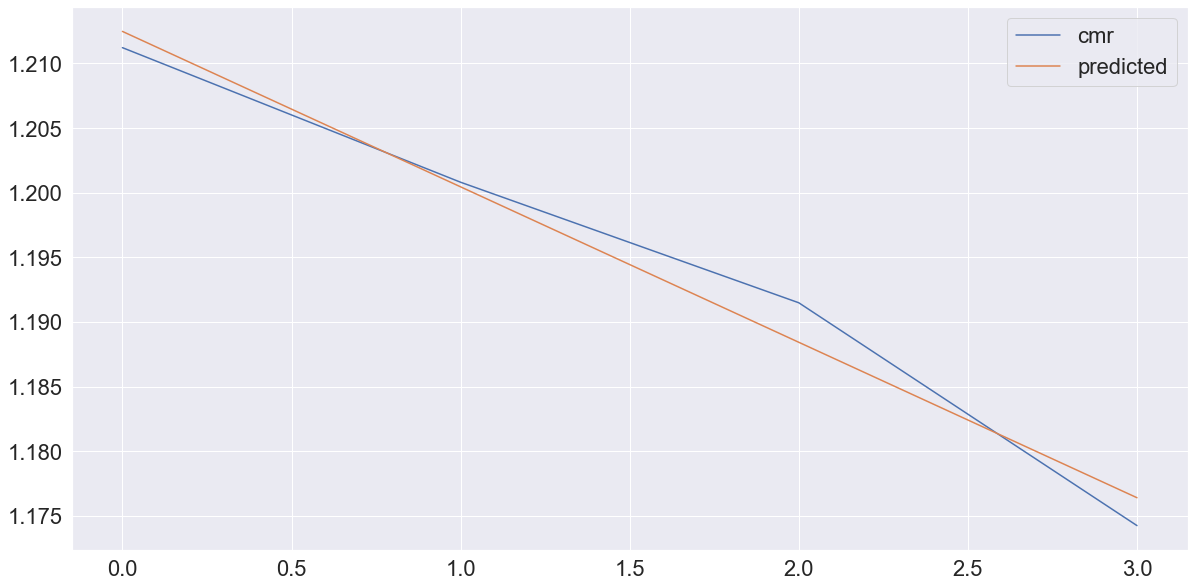

In [61]:
trend_area_at['predicted'] = pd.Series(np.polyval(coeff_at, trend_area_at.Jahr))
sns.set(font_scale=2)
trend_area_at[['cmr', 'predicted']].plot()
plt.gcf().set_size_inches(20, 10)

### Anhand von Trend CMR von 2021 bestimmen

In [62]:
cmr_df_at.loc[-1] = [2021, np.polyval(coeff_at, 2021)* cmr_df_at.loc[(cmr_df_at["Jahr"]==2020)]["Sterberate_bereinigt"][0], np.polyval(coeff_at, 2021)]  # adding a row
cmr_df_at.index = cmr_df_at.index + 1  # shifting index
cmr_df_at.sort_index(inplace=True)
cmr_df_at

,Jahr,Sterberate_bereinigt,cmr
0,2021.0,1407.009453,1.164370
1,2020.0,1208.386443,1.174240
2,2019.0,1121.518767,1.191481
3,2018.0,1142.991848,1.200807
4,2017.0,1149.662777,1.211221
5,2016.0,1132.523083,1.221471
6,2015.0,1187.634373,1.227325
7,2014.0,1142.883523,1.242576
8,2013.0,1183.266445,1.257551
9,2012.0,1199.729171,1.269886


# Berechnung des Erwartungswerts

In [69]:
df_gesamt_bev_at =  bevölkerung_österreich.loc[bevölkerung_österreich.Altersgruppen == "Gesamt"][["Jahr", "Insgesamt"]]
df_gesamt_bev_at = df_gesamt_bev_at.loc[df_gesamt_bev_at.Jahr >2005].sort_values("Jahr",ascending=False).reset_index(drop= True)
df_gesamt_bev_at

,Jahr,Insgesamt
0,2021,8932664
1,2020,8901064
2,2019,8858775
3,2018,8822267
4,2017,8772865
5,2016,8700471
6,2015,8584926
7,2014,8507786
8,2013,8451860
9,2012,8408121


### Rückrechnung über CMR auf die erwarteten Toten

In [126]:
sterberaten_bereinigt_at

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2020,1208.3864430727,107941.1007812381,91924.1890335807
1,2019,1121.5187666892,99827.1031950189,83784.0584848357
2,2018,1142.9918484890,101255.0761259810,84322.5024389989
3,2017,1149.6627770366,101426.3197897792,83738.9123268168
4,2016,1132.5230829154,99354.7211580070,81340.2224643930
5,2015,1187.6343731146,103329.7842188711,84191.0841611215
6,2014,1142.8835228494,98115.7047028158,78961.5100041303
7,2013,1183.2664446039,100669.7769167050,80052.2239407657
8,2012,1199.7291705836,101399.4298768853,79849.2256426852
9,2011,1181.0620663644,99305.1276250232,76779.9515279940


In [130]:

df_gesamt_bev_at


,Jahr,Insgesamt
0,2021,8932664
1,2020,8901064
2,2019,8858775
3,2018,8822267
4,2017,8772865
5,2016,8700471
6,2015,8584926
7,2014,8507786
8,2013,8451860
9,2012,8408121


In [129]:
sterberaten_bereinigt_at["Todesfälle_altersbereinigt"] = (sterberaten_bereinigt_at.Sterberate_bereinigt/100000) * df_gesamt_bev_at[1:].Insgesamt
sterberaten_bereinigt_at["Todesfälle_rohe"] = (sterberaten_roh_at.Sterberate_Roh/100000) * df_gesamt_bev_at.Insgesamt
pd.options.display.float_format = '{:.10f}'.format
sterberaten_bereinigt_at

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2020,1208.3864430727,NaN,91924.1890335807
1,2019,1121.5187666892,99827.1031950189,83784.0584848357
2,2018,1142.9918484890,101255.0761259810,84322.5024389989
3,2017,1149.6627770366,101426.3197897792,83738.9123268168
4,2016,1132.5230829154,99354.7211580070,81340.2224643930
5,2015,1187.6343731146,103329.7842188711,84191.0841611215
6,2014,1142.8835228494,98115.7047028158,78961.5100041303
7,2013,1183.2664446039,100669.7769167050,80052.2239407657
8,2012,1199.7291705836,101399.4298768853,79849.2256426852
9,2011,1181.0620663644,99305.1276250232,76779.9515279940


Jahr 2020 aus den Daten entfernen, da dies vorhergesagt werden soll

In [86]:
lm_test_df_at = sterberaten_bereinigt_at.loc[(sterberaten_bereinigt_at["Jahr"] > 2005) & (sterberaten_bereinigt_at["Jahr"] < 2020 )]
lm_test_df_at

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
1,2019,1121.5187666892,99827.1031950189,83784.0584848357
2,2018,1142.9918484890,101255.0761259810,84322.5024389989
3,2017,1149.6627770366,101426.3197897792,83738.9123268168
4,2016,1132.5230829154,99354.7211580070,81340.2224643930
5,2015,1187.6343731146,103329.7842188711,84191.0841611215
6,2014,1142.8835228494,98115.7047028158,78961.5100041303
7,2013,1183.2664446039,100669.7769167050,80052.2239407657
8,2012,1199.7291705836,101399.4298768853,79849.2256426852
9,2011,1181.0620663644,99305.1276250232,76779.9515279940
10,2010,1220.0354619490,102179.9707963849,77416.4180193047


In [87]:
#Datensatz aufbereiten
trainings_df = lm_test_df_at.copy()
trainings_df = trainings_df.sort_values('Jahr')
trainings_df = trainings_df.reset_index(drop= True)
trainings_df

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2006,1312.6493347203,108726.5343709897,74553.1959568215
1,2007,1275.6344704605,105979.5714860639,74850.2809042007
2,2008,1249.9217302637,104181.0137151292,75327.1375598836
3,2009,1253.3908793546,104678.7316382562,77535.4834285003
4,2010,1220.0354619490,102179.9707963849,77416.4180193047
5,2011,1181.0620663644,99305.1276250232,76779.9515279940
6,2012,1199.7291705836,101399.4298768853,79849.2256426852
7,2013,1183.2664446039,100669.7769167050,80052.2239407657
8,2014,1142.8835228494,98115.7047028158,78961.5100041303
9,2015,1187.6343731146,103329.7842188711,84191.0841611215


## Erstellen der Trendline polynom 2 Grades

In [88]:
coeff_2021 = np.polyfit(trainings_df.Jahr, trainings_df.Todesfälle_altersbereinigt ,2) # 1 = linear, 2 = x^2
m_2021 = coeff_2021[0]
b_2021 = coeff_2021[1]

## Erstellen der Trendline linear

In [89]:
coeff_2021_2 = np.polyfit(trainings_df.Jahr, trainings_df.Todesfälle_altersbereinigt ,1) # 1 = linear, 2 = x^2
m_2021_2 = coeff_2021_2[0]
b_2021_2 = coeff_2021_2[1]

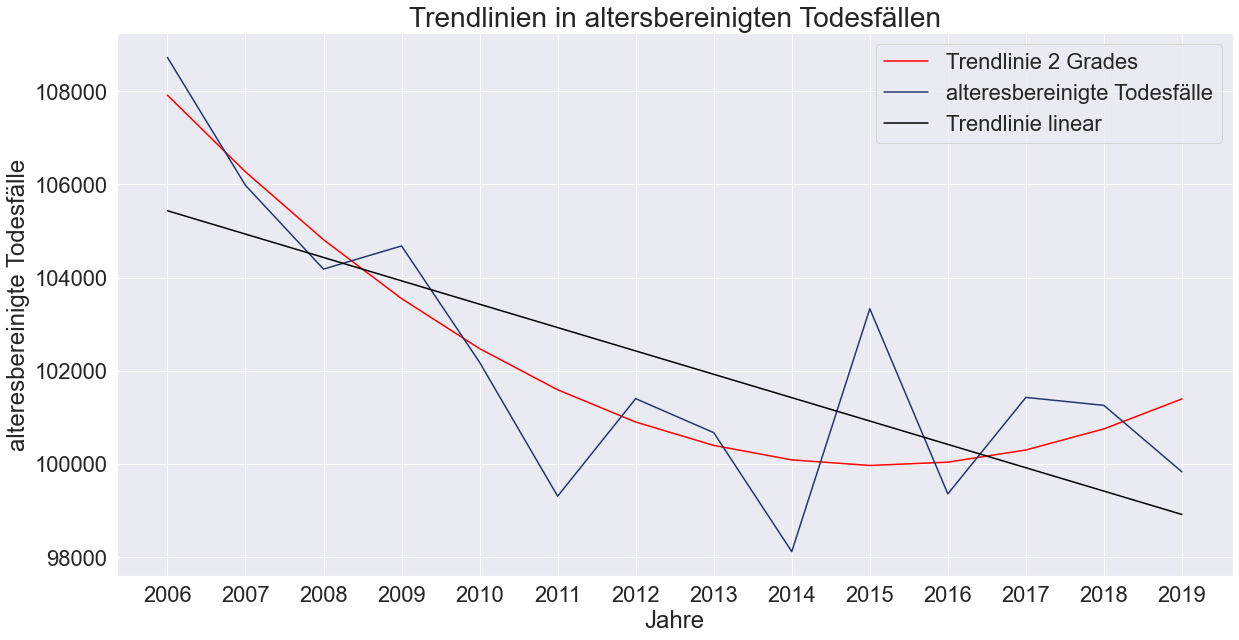

In [90]:
trainings_df['predicted'] = pd.Series(np.polyval(coeff_2021, trainings_df.Jahr))
trainings_df['predicted_2'] = pd.Series(np.polyval(coeff_2021_2, trainings_df.Jahr))
sns.set(font_scale=2)


ax = sns.lineplot(x="Jahr",  y='predicted', data=trainings_df, color ="red")
plot_linear = sns.lineplot(ax=ax, x="Jahr",  y='Todesfälle_altersbereinigt', data=trainings_df, color=hs_blau)
plot_linear2 = sns.lineplot(ax=plot_linear, x="Jahr",  y='predicted_2', data=trainings_df, color="black")
plt.legend(labels=['Trendlinie 2 Grades', 'alteresbereinigte Todesfälle', "Trendlinie linear"])
sns.set_theme(style="whitegrid")

plot_linear.set_title("Trendlinien in altersbereinigten Todesfällen", fontsize= 28)
plot_linear.ticklabel_format(axis="y", style="plain")
plot_linear.set_ylabel("alteresbereinigte Todesfälle")
plot_linear.set_xlabel("Jahre")
plt.xticks(range(2006, 2020, 1))

plt.gcf().set_size_inches(20, 10)

### Erwartungswert Tote 2020

In [91]:
pred_totesfaelle_at = np.polyval(coeff_2021, 2020)  # adding a row
pred_totesfaelle_at

102227.7923463583

### Erwartungswert Tote von 2006-2021

In [118]:
sterberaten_bereinigt_at

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2020,1208.3864430727,107941.1007812381,91924.1890335807
1,2019,1121.5187666892,99827.1031950189,83784.0584848357
2,2018,1142.9918484890,101255.0761259810,84322.5024389989
3,2017,1149.6627770366,101426.3197897792,83738.9123268168
4,2016,1132.5230829154,99354.7211580070,81340.2224643930
5,2015,1187.6343731146,103329.7842188711,84191.0841611215
6,2014,1142.8835228494,98115.7047028158,78961.5100041303
7,2013,1183.2664446039,100669.7769167050,80052.2239407657
8,2012,1199.7291705836,101399.4298768853,79849.2256426852
9,2011,1181.0620663644,99305.1276250232,76779.9515279940


In [122]:
# #Erwarteten Todesfälle
erwartungswerte_at = []
for idx2 in range(2006,2021,1):
     erwartungswerte_at.append([idx2,np.polyval(coeff_2021_2, idx2)])
df_erwartungswerte_at = pd.DataFrame(erwartungswerte_at, columns=["Jahr", "Erwartete Todesfälle"])
df_erwartungswerte_at

,Jahr,Erwartete Todesfälle
0,2006,105434.5079376044
1,2007,104932.8129319939
2,2008,104431.1179263834
3,2009,103929.4229207728
4,2010,103427.7279151623
5,2011,102926.0329095518
6,2012,102424.3379039413
7,2013,101922.6428983307
8,2014,101420.9478927202
9,2015,100919.2528871098


In [106]:
# #Erwarteten Todesfälle
# erwartungswerte_at = []
#
# #bestimmen der erwarteten Toten von 2000 - 2010 anhand polyfit insgesamt
# for idx2 in range(2000,2010,1):
#     erwartungswerte_at.append([idx2,np.polyval(coeff_2021, idx2)])
#
# # #bestimmen der erwarteten Toten von 2010 - 2021 anhand polyfit der letzten 10 jahre
# # for idx in range(1999,2010,1):
# #
# #     temp_df = sterberaten_bereinigt_at.loc[(sterberaten_bereinigt_at["Jahr"] > idx) & (sterberaten_bereinigt_at["Jahr"] < idx+11)]
# #     coeff_temp = np.polyfit(temp_df.Jahr, temp_df.Todesfälle_altersbereinigt ,2) # 1 = linear
# #     m_temp = coeff_temp[0]
# #     b_temp = coeff_temp[1]
# #     erwartungswerte_at.append([idx+12,np.polyval(coeff_2021, idx+12)])
#
# df_erwartungswerte_at = pd.DataFrame(erwartungswerte_at, columns=["Jahr", "Erwartete Todesfälle"])
# df_erwartungswerte_at

,Jahr,Erwartete Todesfälle
0,2000,121804.2286766768
1,2001,119012.3249787688
2,2002,116411.2720052004
3,2003,114001.0697559714
4,2004,111781.7182310820
5,2005,109753.2174305916
6,2006,107915.5673545003
7,2007,106268.7680027485
8,2008,104812.8193752766
9,2009,103547.7214722037


In [125]:
df_2016_bis_2020_at = sterberaten_bereinigt_at.loc[sterberaten_bereinigt_at.Jahr > 2005].sort_values("Jahr").reset_index(drop=True)
df_2016_bis_2020_at["Delta_erwartet_altersbereinigt"] = df_2016_bis_2020_at["Todesfälle_altersbereinigt"] - df_erwartungswerte_at["Erwartete Todesfälle"]
df_2016_bis_2020_at

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe,Delta_erwartet_altersbereinigt
0,2006,1312.6493347203,108726.5343709897,74553.1959568215,3292.0264333852
1,2007,1275.6344704605,105979.5714860639,74850.2809042007,1046.7585540701
2,2008,1249.9217302637,104181.0137151292,75327.1375598836,-250.1042112542
3,2009,1253.3908793546,104678.7316382562,77535.4834285003,749.3087174834
4,2010,1220.0354619490,102179.9707963849,77416.4180193047,-1247.7571187775
5,2011,1181.0620663644,99305.1276250232,76779.9515279940,-3620.9052845286
6,2012,1199.7291705836,101399.4298768853,79849.2256426852,-1024.9080270560
7,2013,1183.2664446039,100669.7769167050,80052.2239407657,-1252.8659816257
8,2014,1142.8835228494,98115.7047028158,78961.5100041303,-3305.2431899044
9,2015,1187.6343731146,103329.7842188711,84191.0841611215,2410.5313317614


### Mean und Standardabweichung

In [108]:
# mean sollte ~ 0 sein
mean_delta_at = df_2016_bis_2020_at.Delta_erwartet_altersbereinigt.mean()

#Standardabweichung
std_delta_at = df_2016_bis_2020_at.Delta_erwartet_altersbereinigt.std()
std_delta_at

6221.063125731756

### Barplot über Todesfälle - Erwartete Todesfälle (Altersbereinigt)

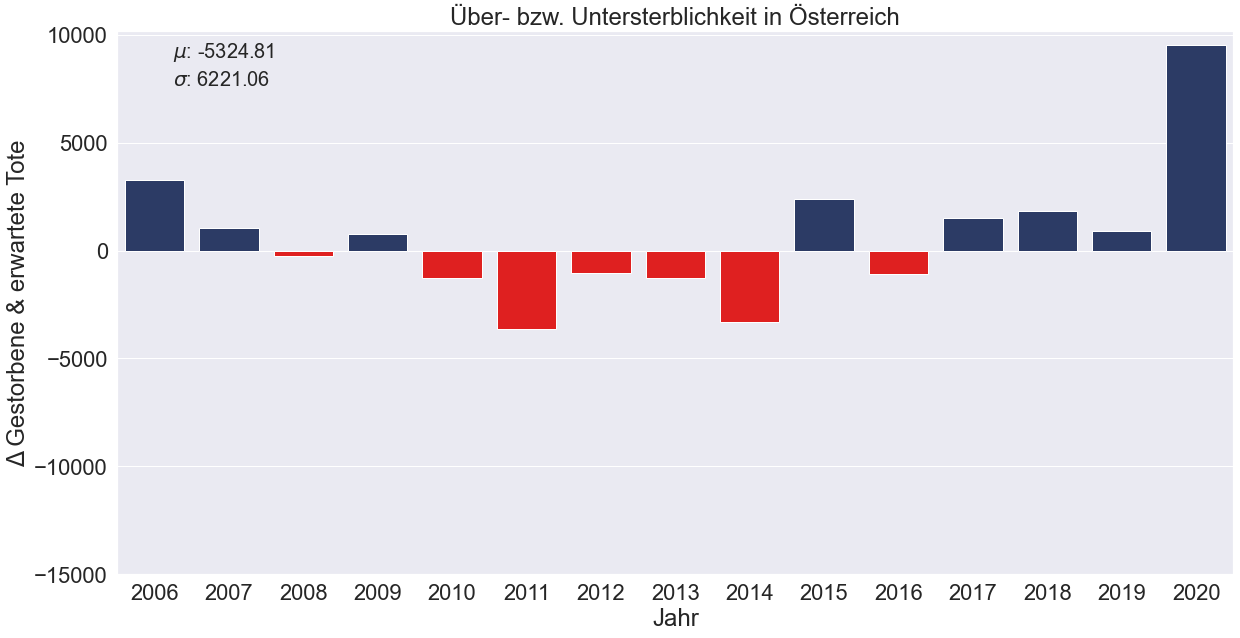

In [124]:
clrs = ['red' if y<=0 else hs_blau for y in df_2016_bis_2020_at.Delta_erwartet_altersbereinigt]
barplot_todesfaelle_at = sns.barplot(data = df_2016_bis_2020_at, x= "Jahr", y = "Delta_erwartet_altersbereinigt", palette=clrs)
sns.set(font_scale=2)
plt.gcf().set_size_inches(20, 10)

barplot_todesfaelle_at.axes.annotate(f"$\mu$: {mean_delta_at:.2f}", xy=(0.05,0.95), xycoords='axes fraction', fontsize = 20)
barplot_todesfaelle_at.axes.annotate(f"$\sigma$: {std_delta_at:.2f}", xy=(0.05,0.9), xycoords='axes fraction', fontsize = 20)

barplot_todesfaelle_at.set_ylabel("Δ Gestorbene & erwartete Tote")
barplot_todesfaelle_at.set_xlabel("Jahr")
barplot_todesfaelle_at.set_title("Über- bzw. Untersterblichkeit in Österreich")
y1 = df_2016_bis_2020_at.Delta_erwartet_altersbereinigt
# plt.yticks(range(-40000, 50000, 10000))
plt.yticks(range(-15000, 15000, 5000))


plt.gcf().set_size_inches(20, 10)